# Visualising Earnings based on College Majors

`Matplotlib` and plotting functionalities in `pandas` library are particularly useful to carry out `Descriptive Analysis` to establish some basic understanding of our underlying data. In this project, I will attempt to apply this to explore the job-outcomes of students who graduated from college (2010-2012), the dataset for which was released by `American Community Survey`. A cleaned and aggregated subset of the data can be found on - https://github.com/fivethirtyeight/data/tree/master/college-majors.

Throughout the descriptive analysis, I will pose some relevant questions, attempt to visualise the answer using relevant descriptive analytical tools, and then attempt to infer the answers from them.

### Dataset Description
* `Rank` - Rank by median earnings (the dataset is ordered by this column).
* `Major_code` - Major code.
* `Major` - Major description.
* `Major_category` - Category of major.
* `Total` - Total number of people with major.
* `Sample_size` - Sample size (unweighted) of full-time.
* `Men` - Male graduates.
* `Women` - Female graduates.
* `ShareWomen` - Women as share of total.
* `Employed` - Number employed.
* `Median` - Median salary of full-time, year-round workers.
* `Low_wage_jobs` - Number in low-wage service jobs.
* `Full_time` - Number employed 35 hours or more.
* `Part_time` - Number employed less than 35 hours.

As the first step, I import the required libraries and set up the necessary tools required for our work. Then I try to understand the structure of my dataset by printing a few rows of the dataset, and using the `describe()` function on it.

In [1]:
# Importing relevant libraries
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Running Jupyter magic to display plots inline
%matplotlib inline

In [3]:
# Reading the csv file into a pandas dataframe object class
recent_grads = pd.read_csv('recent-grads.csv')

In [4]:
# Displaying the column name and values first row of the dataframe 
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [5]:
print(recent_grads.describe())
recent_grads[:5]

             Rank   Major_code          Total            Men          Women  \
count  173.000000   173.000000     172.000000     172.000000     172.000000   
mean    87.000000  3879.815029   39370.081395   16723.406977   22646.674419   
std     50.084928  1687.753140   63483.491009   28122.433474   41057.330740   
min      1.000000  1100.000000     124.000000     119.000000       0.000000   
25%     44.000000  2403.000000    4549.750000    2177.500000    1778.250000   
50%     87.000000  3608.000000   15104.000000    5434.000000    8386.500000   
75%    130.000000  5503.000000   38909.750000   14631.000000   22553.750000   
max    173.000000  6403.000000  393735.000000  173809.000000  307087.000000   

       ShareWomen  Sample_size       Employed      Full_time      Part_time  \
count  172.000000   173.000000     173.000000     173.000000     173.000000   
mean     0.522223   356.080925   31192.763006   26029.306358    8832.398844   
std      0.231205   618.361022   50675.002241   428

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [6]:
# Dropping rows with null values from our data set
print(len(recent_grads))
recent_grads = recent_grads.dropna()
print(len(recent_grads))

173
172


In [7]:
# converting column names to lower case (because i dont like upper-case in my code)
recent_grads.columns = recent_grads.columns.str.lower()
recent_grads.columns

Index(['rank', 'major_code', 'major', 'total', 'men', 'women',
       'major_category', 'sharewomen', 'sample_size', 'employed', 'full_time',
       'part_time', 'full_time_year_round', 'unemployed', 'unemployment_rate',
       'median', 'p25th', 'p75th', 'college_jobs', 'non_college_jobs',
       'low_wage_jobs'],
      dtype='object')

## 1. Searching for Co-relations between our Column-Variables
Having no leads initially, I will draw random scatterplots between 2 variables that I believe should have a corelation between them. I will start with  - 
1. `sample_size` and `median`
2. `sample_size` and `unemployment_rate`
3. `full_time` and `median`
4. `sharewomen` and `unemployment_rate`
5. `men` and `median`
6. `women` and `median`

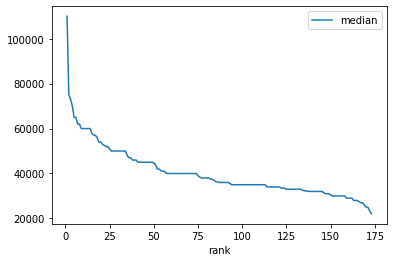

In [25]:
recent_grads.plot('rank','median') #--> 1.1

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


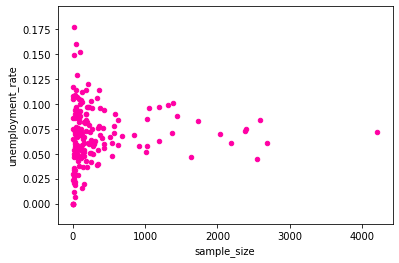

In [31]:
recent_grads.plot.scatter('sample_size','unemployment_rate', c=(1,0/255,164/255))# --> 1.2

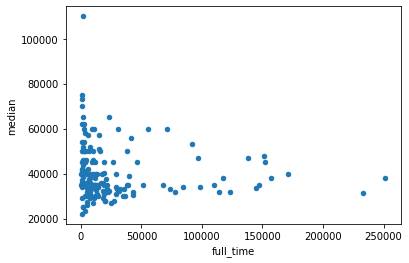

In [10]:
recent_grads.plot('full_time','median', kind = 'scatter') # --> 1.3

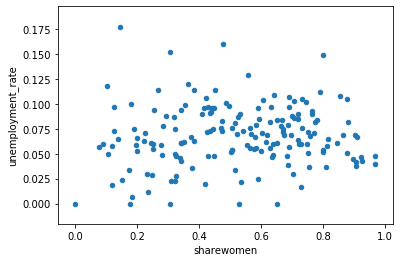

In [11]:
recent_grads.plot('sharewomen','unemployment_rate', kind = 'scatter') # --> 1.4

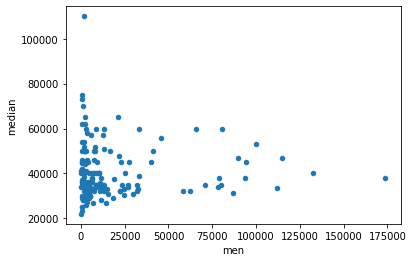

In [12]:
recent_grads.plot('men','median', kind = 'scatter') # --> 1.5

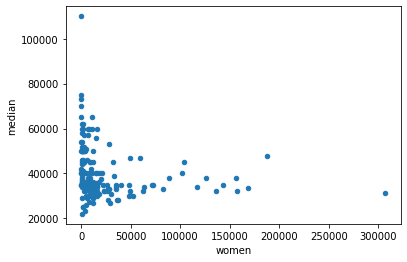

In [13]:
recent_grads.plot('women','median', kind = 'scatter') # --> 1.6

## 1.1 Popular Major  = More \\$$$?
Does a `major` with more students corelate to a higher `median` salary? 

**No.** As per the scatterplot, there is a *slight negative corelation* between the number of students enrolled for a major and the median salary. Also, some of the highest median salaries belong to majors with a medium batch size.

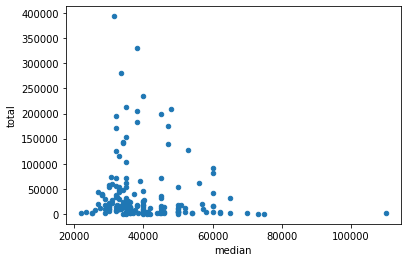

In [14]:
ax = recent_grads.plot.scatter('median','total')

## 1.2 Do Full Time Employees make more \\$$$?
Do `majors` with more percentage of `full_time` employed students have a greater `median` salary? 

**Yes**, `majors` with a higher percentage of `full_time` employed students seem to witness higher `median` salaries overall.

(0, 1)

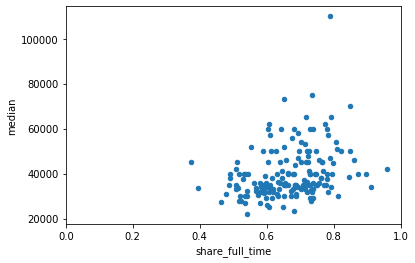

In [15]:
recent_grads['share_full_time'] = recent_grads['full_time']/recent_grads['total']
ax = recent_grads.plot.scatter('share_full_time','median')
ax.set_xlim(0,1)

## 1.3 Do women make more \\$$$?
Do `majors` with a higher share of women have more `median` salary overall?

**No**, `majors` with a higher share of women tend to have a lower `median` salary.

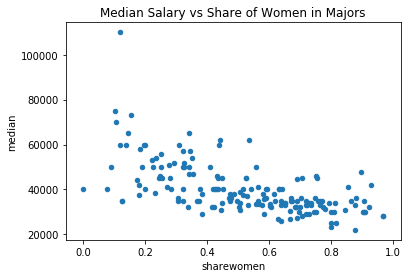

In [16]:
recent_grads.plot.scatter('sharewomen','median', title = 'Median Salary vs Share of Women in Majors')

## 1.4 Are majors predominantly Male or Female?
Do `majors` mostly consist of males or females?

**Females**, but by a small margin! The histogram below shows visibly higher frequencies of female-majority `majors` in the 0.5 to 1.0 range of `sharewomen`.

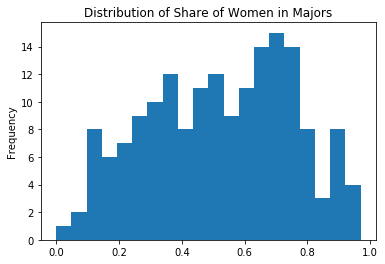

In [17]:
recent_grads['sharewomen'].plot.hist(bins = 20, title = 'Distribution of Share of Women in Majors')

## 1.5 What median salary range is Most Common?
**30,000 to 40,000** range is the most common median salary range among the `majors` as per the histogram below.

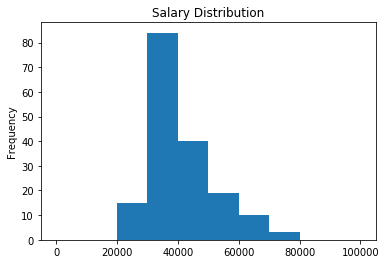

In [18]:
ax = recent_grads['median'].plot.hist(bins = 10, range = (0,100000), title = 'Salary Distribution')

recent_grads[:8]

## 1.6 Which `major_category` has the most (& least) students men (& women) on average?
Using the bar plot below, we can see that 
* `Business` major category has the highest average number of Male students enrolled.
* `Communication & Journalism` major category has the highest average number of Female students enrolled.

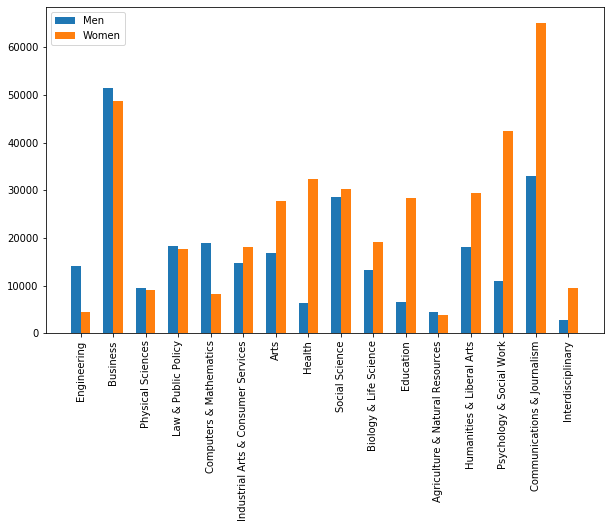

In [19]:
from numpy import arange 

categories = recent_grads['major_category'].unique()
avg_of_totals_men = []
avg_of_totals_women = []

for category in categories:
    avg_of_totals_men.append(recent_grads.loc[recent_grads['major_category']==category, 'men'].mean())
    avg_of_totals_women.append(recent_grads.loc[recent_grads['major_category']==category, 'women'].mean())

fig, ax = plt.subplots(figsize = (10,6))

ax.bar(arange(0,16)-0.15, avg_of_totals_men, 0.3,label = 'Men')
ax.bar(arange(0,16)+0.15, avg_of_totals_women, 0.3, label = 'Women')
ax.set_xticks(arange(0,16))
ax.set_xticklabels(categories)
plt.xticks(rotation = 90)
plt.legend()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000079A4A0A648>,
      dtype=object)

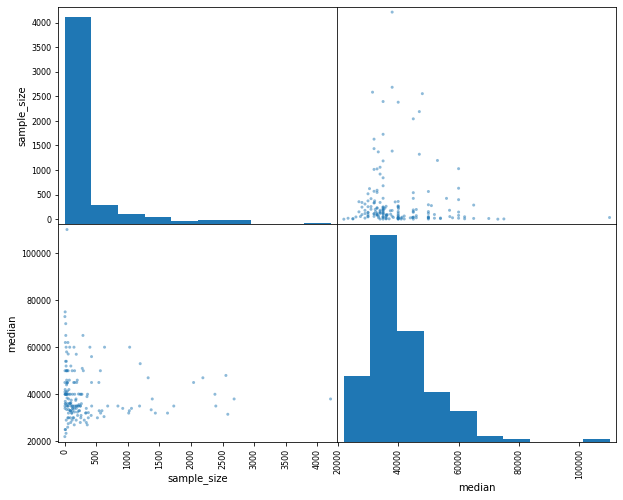

In [20]:
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[['sample_size','median']], figsize = (10,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000079A4FB76C8>,
      dtype=object)

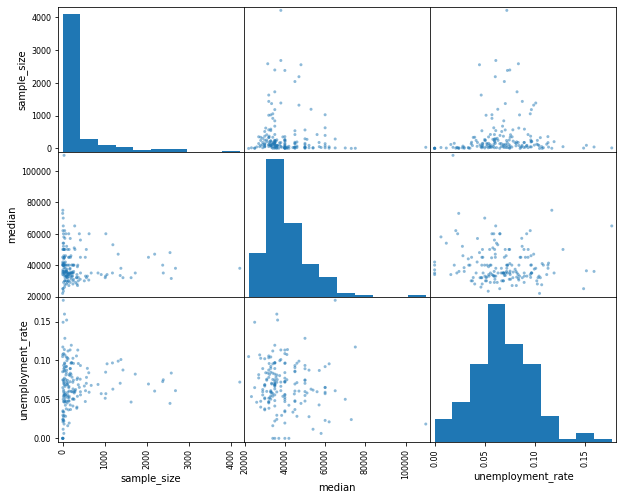

In [21]:
scatter_matrix(recent_grads[['sample_size','median', 'unemployment_rate']], figsize = (10,8))

### Bonus: HexBin plot
Hex bin plots can be particularly useful in place of some dense scatterplots. Here, I have taken the scatterplot previously drawin in **1.2** as a reference, which yields the same results.

Text(0.5, 0, 'share_full_time')

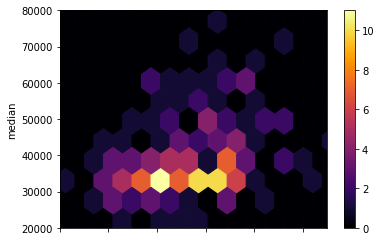

In [22]:
recent_grads.plot.hexbin(x = 'share_full_time',y = 'median', gridsize = 15, cmap='inferno')
plt.xlim(0.4,0.95)
plt.ylim(20000,80000)
plt.xlabel('share_full_time')

## Conclusion
1. Less Popular Majors tend to have More median Salary
2. Full-Time employed students tend to have higher salaries
3. Women don't tend to make more \\$$ than their male counterpart
4. Majors as a whole are predominantly female
5. 30k to 40k is the most common salary-bracket for students when employed
6. `Communication & Journalism` major has the most female students, while `Business` major has the most male students

-Author : Raghav_A